<a href="https://colab.research.google.com/github/vatiza/Machine_Learning/blob/main/Unboxing_an_Industry_Level_Deep_Learning_Model_for_Brain_Anomaly_Detection_An_Elaborative_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unboxing_an_Industry_Level_Deep_Learning_Model_for_Brain_Anomaly_Detection_An_Elaborative_Study.**  
Brain Tumors are complex. There are a lot of abnormalities in the size and location of the brain tumor(s). This makes it really difficult for a complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging and time-consuming to generate reports from MRI’. So an automated system on the Cloud can solve this problem.


---
# **About Dataset**

```
Authors
Sartaj (Owner)
```
[Brain Tumor Classification (MRI)](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data)



```
Usability
8.75  
License: CC0 Public Domain  
Update frequency: Unspecified  
**Data Explorer**
Version 2 (93.08 MB)
Summary: 3264 files
Classify MRI images into four classes  
1. glioma_tumor
2. meningioma_tumor
3. no_tumor
4. pituitary_tumor
```
---


Load Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Import

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os
path = os.listdir('/content/drive/MyDrive/Colab Notebooks/Datasets/BrainData/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [8]:
import cv2
X=[]
Y=[]
for cls in classes:
  df='/content/drive/MyDrive/Colab Notebooks/Datasets/BrainData/Training/'+cls
  for j in os.listdir(df):
    img=cv2.imread(df+'/'+j,0)
    img=cv2.resize(img,(200,200))
    X.append(img)
    Y.append(classes[cls])

In [14]:
X=np.array(X)
Y=np.array(Y)
X_updated = X.reshape(len(X), -1)

In [11]:
np.unique(Y)

array([0, 1])

In [12]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [15]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

Visualize data

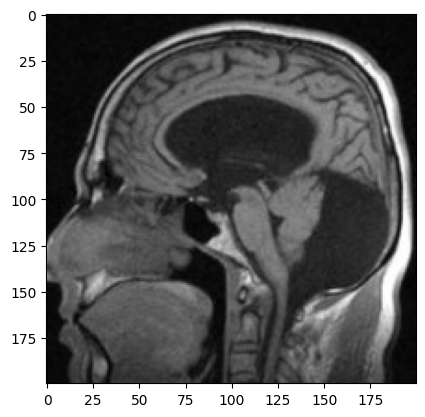

In [16]:
plt.imshow(X[0], cmap='gray')

In [17]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

Split Data

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [19]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

Feature Scaling

In [20]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Feature Selection: PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [ ]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

Train Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [25]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [26]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

Evaluation

In [27]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9428571428571428


In [28]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9948822927328557
Testing Score: 0.9591836734693877


Prediction

In [29]:
pred = sv.predict(xtest)

In [30]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  4,  32,  73,  75,  76,  90,  94, 138, 149, 204]),)

In [31]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  10
1 1


---

**TEST MODEL**

In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

NameError: ignored

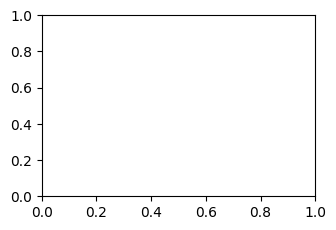

In [32]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Colab Notebooks/Datasets/BrainData/Testing')
c=1
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Datasets/BrainData/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Datasets/BrainData/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

NameError: ignored

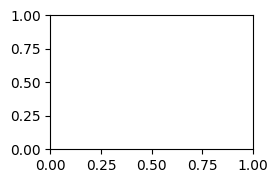

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Colab Notebooks/Datasets/BrainData/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/Datasets/BrainData/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Datasets/BrainData/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1